In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [2]:
artists_df = pd.read_csv('artists.csv')
artworks_df = pd.read_csv('artworks.csv')
art_on_view_df = pd.read_excel('art_on_view.xlsx')

In [3]:
pd.set_option('display.max_columns', None) # show all columns horizontally
pd.set_option('display.max_rows', 500) # show up to 500 rows vertically


**When you have all the files loaded in the Notebook. It is always a good practice to see the shape of the dataset and couple of rows**

In [4]:
print("Shape: ", artists_df.shape)
print(artists_df.head(5))

Shape:  (15638, 9)
   ConstituentID      DisplayName            ArtistBio Nationality Gender  \
0              1   Robert Arneson  American, 1930–1992    American   male   
1              2   Doroteo Arnaiz   Spanish, born 1936     Spanish   male   
2              3      Bill Arnold  American, born 1941    American   male   
3              4  Charles Arnoldi  American, born 1946    American   male   
4              5      Per Arnoldi    Danish, born 1941      Danish   male   

   BeginDate  EndDate  Wiki QID         ULAN  
0       1930     1992       NaN          NaN  
1       1936        0       NaN          NaN  
2       1941        0       NaN          NaN  
3       1946        0  Q1063584  500027998.0  
4       1941        0       NaN          NaN  


In [5]:
print("Shape: ",artworks_df.shape)
print(artworks_df.head(5))

Shape:  (157630, 30)
                                               Title  \
0  Ferdinandsbrücke Project, Vienna, Austria (Ele...   
1  City of Music, National Superior Conservatory ...   
2  Villa project, outside Vienna, Austria (Elevat...   
3  The Manhattan Transcripts Project, New York, N...   
4  Villa project, outside Vienna, Austria (Exteri...   

                     Artist ConstituentID  \
0               Otto Wagner          6210   
1  Christian de Portzamparc          7470   
2                Emil Hoppe          7605   
3           Bernard Tschumi          7056   
4                Emil Hoppe          7605   

                                   ArtistBio Nationality BeginDate EndDate  \
0                      (Austrian, 1841–1918)  (Austrian)    (1841)  (1918)   
1                        (French, born 1944)    (French)    (1944)     (0)   
2                      (Austrian, 1876–1957)  (Austrian)    (1876)  (1957)   
3  (French and Swiss, born Switzerland 1944)          ()   

In [6]:
print("Shape: ",art_on_view_df.shape)
print(art_on_view_df.head(5))

Shape:  (661, 7)
   ConstituentID            DisplayName  \
0             11        Jean (Hans) Arp   
1             19    Richard Artschwager   
2             34            Alvar Aalto   
3             38  Magdalena Abakanowicz   
4             60            Ansel Adams   

                                  ArtistBio Nationality  Gender  BeginDate  \
0  French, born Germany (Alsace). 1886–1966      French    male       1886   
1                       American, 1923–2013    American    male       1923   
2                        Finnish, 1898–1976     Finnish    male       1898   
3                         Polish, 1930–2017      Polish  female       1930   
4                       American, 1902–1984    American    male       1902   

   EndDate  
0     1966  
1     2013  
2     1976  
3     2017  
4     1984  


**Commonalities:** When you look at multiple dataframes through head(#) method, you can spot some key attributes like:
- Common columns
- Null values
- Data types

In [7]:
artworks_df.dtypes

# merged_df = artworks_df.merge(artists_df, on='ConstituentID', how='left')
# print("Merged DataFrame Shape: ", merged_df.shape)
# print(merged_df.head(5))

Title                  object
Artist                 object
ConstituentID          object
ArtistBio              object
Nationality            object
BeginDate              object
EndDate                object
Gender                 object
Date                   object
Medium                 object
Dimensions             object
CreditLine             object
AccessionNumber        object
Classification         object
Department             object
DateAcquired           object
Cataloged              object
ObjectID                int64
URL                    object
ImageURL               object
OnView                 object
Circumference (cm)    float64
Depth (cm)            float64
Diameter (cm)         float64
Height (cm)           float64
Length (cm)           float64
Weight (kg)           float64
Width (cm)            float64
Seat Height (cm)      float64
Duration (sec.)       float64
dtype: object

### Type Conversion before merging
To avoid conflicts as shown above, it is important to alignment of the data types before merging

In [8]:
artists_df['ConstituentID'] = artists_df['ConstituentID'].astype(str)
artworks_df['ConstituentID'] = artworks_df['ConstituentID'].astype(str)
art_on_view_df['ConstituentID'] = art_on_view_df['ConstituentID'].astype(str)

In [9]:
merged_df = pd.merge(artworks_df, artists_df, on='ConstituentID', how='left')
print("merged_df: ", merged_df.shape)
print(merged_df.head(5))

merged_df:  (157630, 38)
                                               Title  \
0  Ferdinandsbrücke Project, Vienna, Austria (Ele...   
1  City of Music, National Superior Conservatory ...   
2  Villa project, outside Vienna, Austria (Elevat...   
3  The Manhattan Transcripts Project, New York, N...   
4  Villa project, outside Vienna, Austria (Exteri...   

                     Artist ConstituentID  \
0               Otto Wagner          6210   
1  Christian de Portzamparc          7470   
2                Emil Hoppe          7605   
3           Bernard Tschumi          7056   
4                Emil Hoppe          7605   

                                 ArtistBio_x Nationality_x BeginDate_x  \
0                      (Austrian, 1841–1918)    (Austrian)      (1841)   
1                        (French, born 1944)      (French)      (1944)   
2                      (Austrian, 1876–1957)    (Austrian)      (1876)   
3  (French and Swiss, born Switzerland 1944)            ()      (1944) 

In [10]:
merged_on_view_df = pd.merge(merged_df, art_on_view_df, on='ConstituentID', how='left')
print("merged_on_view_df: ", merged_on_view_df.shape)
print(merged_on_view_df.head(5))

merged_on_view_df:  (157630, 44)
                                               Title  \
0  Ferdinandsbrücke Project, Vienna, Austria (Ele...   
1  City of Music, National Superior Conservatory ...   
2  Villa project, outside Vienna, Austria (Elevat...   
3  The Manhattan Transcripts Project, New York, N...   
4  Villa project, outside Vienna, Austria (Exteri...   

                     Artist ConstituentID  \
0               Otto Wagner          6210   
1  Christian de Portzamparc          7470   
2                Emil Hoppe          7605   
3           Bernard Tschumi          7056   
4                Emil Hoppe          7605   

                                 ArtistBio_x Nationality_x BeginDate_x  \
0                      (Austrian, 1841–1918)    (Austrian)      (1841)   
1                        (French, born 1944)      (French)      (1944)   
2                      (Austrian, 1876–1957)    (Austrian)      (1876)   
3  (French and Swiss, born Switzerland 1944)            ()     

In [11]:
merged_on_view_df.dtypes

Title                  object
Artist                 object
ConstituentID          object
ArtistBio_x            object
Nationality_x          object
BeginDate_x            object
EndDate_x              object
Gender_x               object
Date                   object
Medium                 object
Dimensions             object
CreditLine             object
AccessionNumber        object
Classification         object
Department             object
DateAcquired           object
Cataloged              object
ObjectID                int64
URL                    object
ImageURL               object
OnView                 object
Circumference (cm)    float64
Depth (cm)            float64
Diameter (cm)         float64
Height (cm)           float64
Length (cm)           float64
Weight (kg)           float64
Width (cm)            float64
Seat Height (cm)      float64
Duration (sec.)       float64
DisplayName_x          object
ArtistBio_y            object
Nationality_y          object
Gender_y  

In [12]:
# converting 'DateAcquired' object type column in merged_on_view_df, to datetime for better analysis

merged_on_view_df['DateAcquired'] = pd.to_datetime(merged_on_view_df['DateAcquired'], errors='coerce')

In [13]:
merged_on_view_df.dtypes

Title                         object
Artist                        object
ConstituentID                 object
ArtistBio_x                   object
Nationality_x                 object
BeginDate_x                   object
EndDate_x                     object
Gender_x                      object
Date                          object
Medium                        object
Dimensions                    object
CreditLine                    object
AccessionNumber               object
Classification                object
Department                    object
DateAcquired          datetime64[ns]
Cataloged                     object
ObjectID                       int64
URL                           object
ImageURL                      object
OnView                        object
Circumference (cm)           float64
Depth (cm)                   float64
Diameter (cm)                float64
Height (cm)                  float64
Length (cm)                  float64
Weight (kg)                  float64
W

In [14]:
merged_on_view_df['Artist'].value_counts()

Artist
Ludwig Mies van der Rohe     15491
Eugène Atget                  5031
Louise Bourgeois              3336
Unidentified photographer     2742
Ellsworth Kelly               2193
                             ...  
Kirsten Kraa                     1
Stefan Knapp                     1
Marina Stern                     1
Wolfgang Schmidt                 1
Georg Ettl                       1
Name: count, Length: 14078, dtype: int64

## QUESTIONS:
- How many unique artists are there?
- What are the top 3 nationalities?
- What is the gender distribution?
- What are the top 10 art classification?
- What is the artwork distribution per department?
- What is the artwork acquisition trend per year?
- Find top artists with most amount of art work.
- Find the total artwork on display.

In [32]:
unique_artist = merged_on_view_df['Artist'].unique()
top_nationalities = merged_on_view_df['Nationality'].value_counts().head(5)
gender_distribution = merged_df['Gender_y'].value_counts()
top_artwork_types = merged_on_view_df['Classification'].value_counts().head(10)
artwork_by_department = merged_on_view_df.Department.value_counts()
acquisition_trends_yearly = merged_on_view_df['DateAcquired'].dt.year.value_counts().sort_index()
top_artists_by_artworks = merged_df.DisplayName.value_counts().head(10)
total_art_displayed = merged_on_view_df.OnView.notna().sum()

In [16]:
artwork_by_department

Department
Drawings & Prints                        80420
Architecture & Design                    33612
Photography                              33608
Painting & Sculpture                      4055
Media and Performance                     3198
Fluxus Collection                         1683
Film                                      1024
Architecture & Design - Image Archive       30
Name: count, dtype: int64

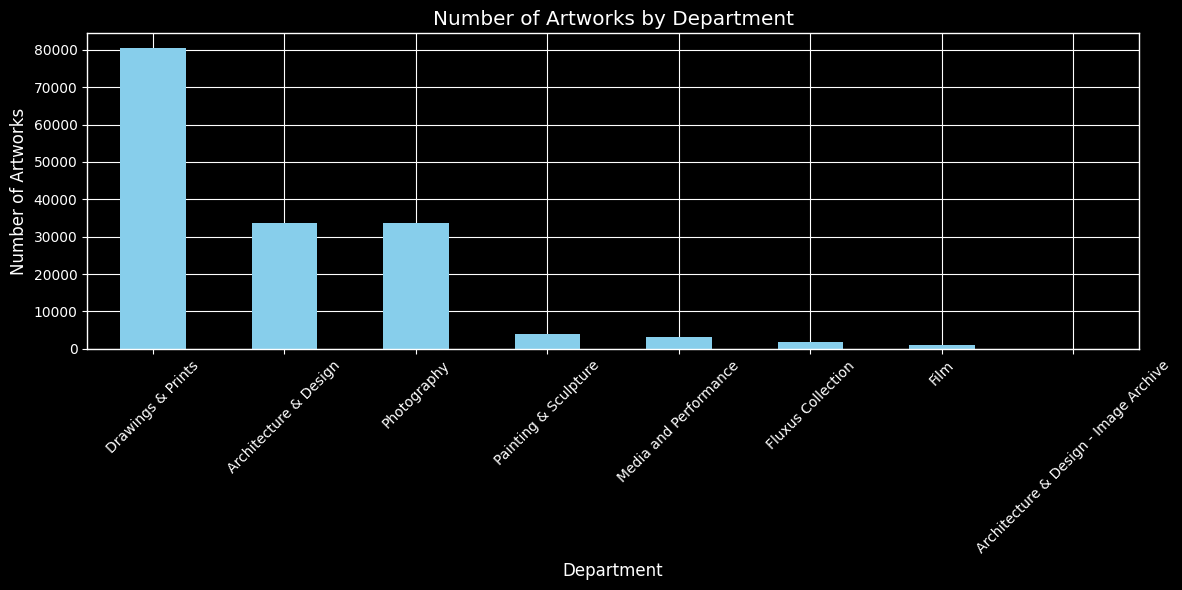

In [46]:

plt.style.use('dark_background')
artwork_by_department.plot(kind='bar', figsize=(12, 6), color='skyblue')
plt.title('Number of Artworks by Department')
plt.xlabel('Department')
plt.ylabel('Number of Artworks')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [18]:
gender_distribution

Gender_y
male                     121010
female                    19608
female (transwoman)          62
non-binary                   12
gender non-conforming         2
transgender woman             1
Name: count, dtype: int64

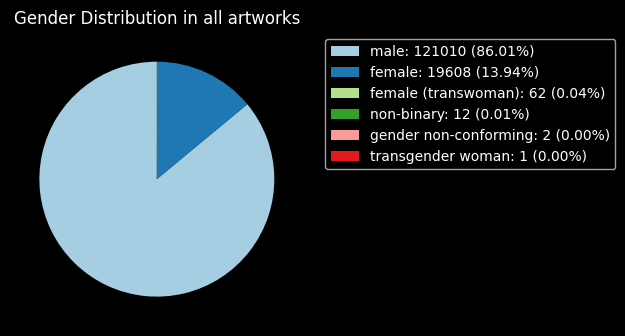

In [43]:
# Generated by AI
plt.style.use('dark_background')
plt.figure(figsize=(6, 5))
colors = plt.cm.Paired(range(len(gender_distribution)))
wedges, texts = plt.pie(
    gender_distribution,
    startangle=90,
    colors=colors,
    labels=None,
    wedgeprops={'linewidth': 0, 'edgecolor': 'white'}
)
# Prepare legend labels with counts and percentages
total = gender_distribution.sum()
legend_labels = [
    f"{label}: {count} ({count/total:.2%})"
    for label, count in zip(gender_distribution.index, gender_distribution.values)
]
plt.title('Gender Distribution in all artworks')
plt.legend(wedges, legend_labels, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylabel('')
plt.tight_layout()
plt.show() 

In [20]:
acquisition_trends_yearly

DateAcquired
1929.0        9
1930.0        7
1931.0        3
1932.0       18
1933.0       93
1934.0      284
1935.0      416
1936.0      146
1937.0      322
1938.0      127
1939.0      398
1940.0     1583
1941.0      977
1942.0      938
1943.0     1132
1944.0      346
1945.0      315
1946.0      171
1947.0      475
1948.0      421
1949.0     1588
1950.0      453
1951.0      631
1952.0      550
1953.0      474
1954.0      881
1955.0      446
1956.0     1134
1957.0      303
1958.0      705
1959.0      829
1960.0      449
1961.0      552
1962.0      565
1963.0      951
1964.0    12998
1965.0     2020
1966.0     1859
1967.0     2420
1968.0    19733
1969.0     2194
1970.0     1245
1971.0     1041
1972.0      862
1973.0     1101
1974.0     3394
1975.0      991
1976.0      902
1977.0     1208
1978.0     1349
1979.0     1198
1980.0      680
1981.0     1347
1982.0      851
1983.0     1157
1984.0      869
1985.0     1050
1986.0     1028
1987.0     1321
1988.0     1019
1989.0      891
1990.0     

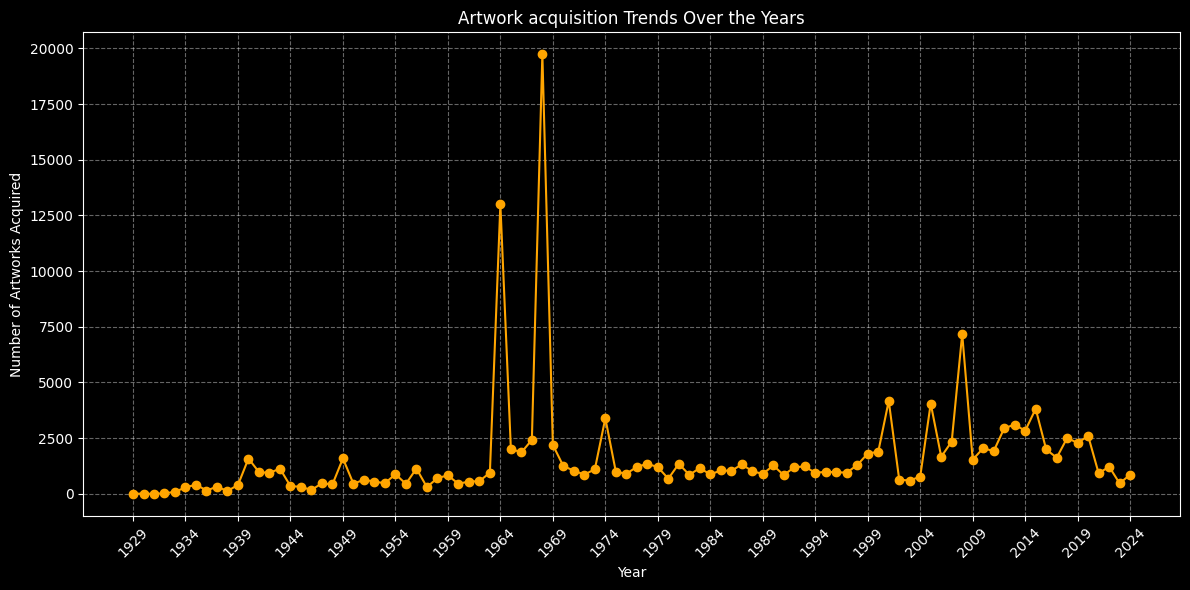

In [39]:
plt.style.use('dark_background')  # Set dark background for the plot

acquisition_trends_yearly.plot(kind='line', figsize=(12, 6), marker='o', color='orange')

plt.title('Artwork acquisition Trends Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Artworks Acquired')
plt.grid(True, linestyle='--', alpha=0.4)

years = acquisition_trends_yearly.index.astype(int)
plt.xticks(
    ticks=years[::5],
    rotation=45
)
plt.tight_layout()
plt.show()

## Some other visualisations

In [33]:
import plotly.express as px
import plotly.io as pio  # Import plotly.io

# Set the default renderer to 'plotly_mimetype' for Jupyter Notebook
# You can choose a different template if you prefer
pio.templates.default = "plotly_dark"
# Or "notebook" if you are using classic Jupyter Notebook
pio.renderers.default = "jupyterlab"

fig1 = px.bar(x=top_nationalities.index,
              y=top_nationalities.values,
              title='Top 3 Nationalities of Artists in MoMA collection',
              labels={'x': 'Nationality', 'y': 'Number of Artists'},
              color=top_nationalities.values)

fig1.show()

### Minor Debugging

In [ ]:
# To check the Python executable path and version of nbformat 
import sys
import nbformat
print(nbformat.__version__)
print(sys.executable)

5.10.4
/usr/local/bin/python3.12
